# Visualização de Dados e Estatísticas Descritivas em Python

Nesta aula, vamos aprender como explorar, descrever e visualizar dados utilizando Python, com foco em estatísticas descritivas e gráficos. Usaremos o dataset de imóveis do Recife.



In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
houses = pd.read_csv("recife.csv", encoding = "ISO-8859-1")


In [7]:
houses.shape  # Dimensões do data frame

(1744, 13)

In [8]:
houses.dtypes  # Tipos das colunas

price          int64
latitude     float64
longitude    float64
bedrooms     float64
area         float64
pkspaces     float64
bathrooms    float64
ensuites     float64
suburb        object
district      object
city          object
state         object
type          object
dtype: object

In [9]:
houses.describe()  # Estatísticas gerais

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites
count,1.744000e+03,1744.000000,1744.000000,1737.000000,1721.000000,1646.000000,1538.000000,764.000000
mean,4.650508e+05,-8.059572,-34.903232,2.998273,120.782493,1.788578,2.676853,1.429319
std,5.927109e+05,0.036093,0.015105,1.057940,95.680958,1.030367,1.281568,0.872759
min,0.000000e+00,-8.159529,-34.971088,1.000000,25.000000,0.000000,0.000000,1.000000
25%,2.300000e+03,-8.064218,-34.910381,2.000000,70.000000,1.000000,2.000000,1.000000
50%,3.500000e+05,-8.045020,-34.902294,3.000000,94.000000,2.000000,3.000000,1.000000
75%,6.300000e+05,-8.033553,-34.894247,4.000000,139.000000,2.000000,3.000000,2.000000
max,7.500000e+06,-7.969322,-34.874427,15.000000,1682.000000,15.000000,8.000000,6.000000


In [10]:
# Média, mediana, moda, variância e desvio padrão do preço
print('Média:', houses['price'].mean())
print('Mediana:', houses['price'].median())
print('Moda:', houses['price'].mode()[0])
print('Variância:', houses['price'].var())
print('Desvio padrão:', houses['price'].std())

Média: 465050.814793578
Mediana: 350000.0
Moda: 350000
Variância: 351306173214.82
Desvio padrão: 592710.8681429926


In [11]:
houses['area'].describe()

count    1721.000000
mean      120.782493
std        95.680958
min        25.000000
25%        70.000000
50%        94.000000
75%       139.000000
max      1682.000000
Name: area, dtype: float64

In [12]:
houses.columns

Index(['price', 'latitude', 'longitude', 'bedrooms', 'area', 'pkspaces',
       'bathrooms', 'ensuites', 'suburb', 'district', 'city', 'state', 'type'],
      dtype='object')

In [62]:
# Adicionando coluna para aluguel e venda
houses['operation'] = 'sell'
houses.loc[(houses['price'] > 100) & (houses['price'] < 30000),'operation'] = 'rent'
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation,price_m2
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,rent,40.540541
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,sell,3837.209302
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,sell,3109.756098
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,sell,4000.000000
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,sell,3092.783505


In [51]:
house_sells = houses.loc[houses.operation=='sell']
house_sells.describe()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_m2
count,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1189.000000,1077.000000,635.000000,1241.000000
mean,6.529424e+05,-8.053465,-34.902696,3.157937,129.007341,1.841043,2.961931,1.486614,5406.849494
std,6.093514e+05,0.031687,0.015373,1.022743,102.358659,1.064011,1.226049,0.926848,3641.687265
min,1.000000e+00,-8.147159,-34.971088,1.000000,25.000000,0.000000,0.000000,1.000000,0.002299
25%,3.300000e+05,-8.053580,-34.910381,3.000000,72.000000,1.000000,2.000000,1.000000,3837.209302
50%,4.700000e+05,-8.043143,-34.902060,3.000000,100.000000,2.000000,3.000000,1.000000,5238.095238
75%,7.400000e+05,-8.033424,-34.892394,4.000000,150.000000,2.000000,3.000000,2.000000,6372.549020
max,7.500000e+06,-7.969322,-34.874427,15.000000,1682.000000,15.000000,8.000000,6.000000,56039.215686


In [64]:
house_rentals = houses.loc[houses.operation=='rent']
house_rentals.describe()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_m2
count,480.000000,480.000000,480.000000,473.000000,480.000000,456.000000,461.000000,129.000000,480.000000
mean,1553.045833,-8.076824,-34.904101,2.676533,99.517833,1.646930,2.010846,1.147287,17.710161
std,1279.372285,0.041243,0.014506,1.001598,71.568884,0.918857,1.156217,0.434827,12.464818
min,150.000000,-8.159529,-34.963768,1.000000,25.000000,0.000000,0.000000,1.000000,1.470588
25%,797.750000,-8.121971,-34.908890,2.000000,60.000000,1.000000,1.000000,1.000000,8.302239
50%,1200.000000,-8.057763,-34.903129,3.000000,85.000000,1.000000,2.000000,1.000000,14.495798
75%,1900.000000,-8.039540,-34.896007,3.000000,120.000000,2.000000,3.000000,1.000000,22.571429
max,12000.000000,-8.015949,-34.876964,8.000000,860.000000,10.000000,6.000000,3.000000,88.564356


In [65]:
# House Rent
# Média, mediana, moda, variância e desvio padrão do preço
print('Média:', house_rentals['price'].mean())
print('Mediana:', house_rentals['price'].median())
print('Moda:', house_rentals['price'].mode()[0])
print('Variância:', house_rentals['price'].var())
print('Desvio padrão:', house_rentals['price'].std())

Média: 1553.0458333333333
Mediana: 1200.0
Moda: 1500
Variância: 1636793.442571329
Desvio padrão: 1279.3722845877696


## Correlação de Pearson

In [66]:
pearson_corr = houses.loc[houses.operation=='sell',
           ['price', 'bedrooms', 'area',
            'bathrooms', 'ensuites']].corr(method='pearson')
pearson_corr

,price,bedrooms,area,bathrooms,ensuites
price,1.000000,0.434416,0.653239,0.519452,0.679669
bedrooms,0.434416,1.000000,0.566756,0.656487,0.562102
area,0.653239,0.566756,1.000000,0.597956,0.669119
bathrooms,0.519452,0.656487,0.597956,1.000000,0.850007
ensuites,0.679669,0.562102,0.669119,0.850007,1.000000


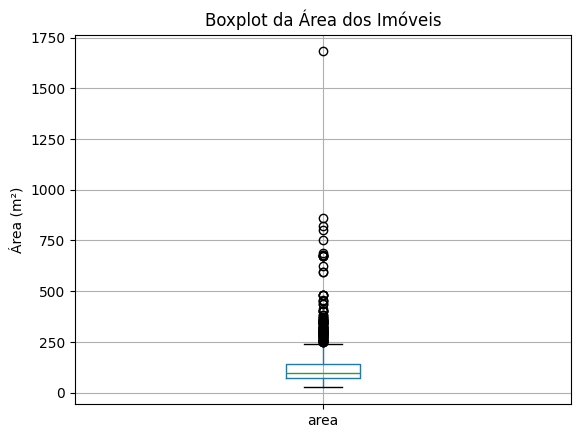

In [18]:
houses.boxplot(column=['area'])
plt.title('Boxplot da Área dos Imóveis')
plt.ylabel('Área (m²)')
plt.show()

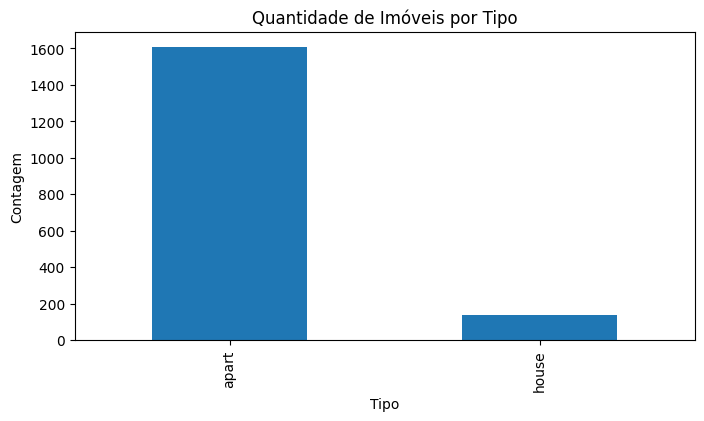

In [19]:
houses['type'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title('Quantidade de Imóveis por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.show()

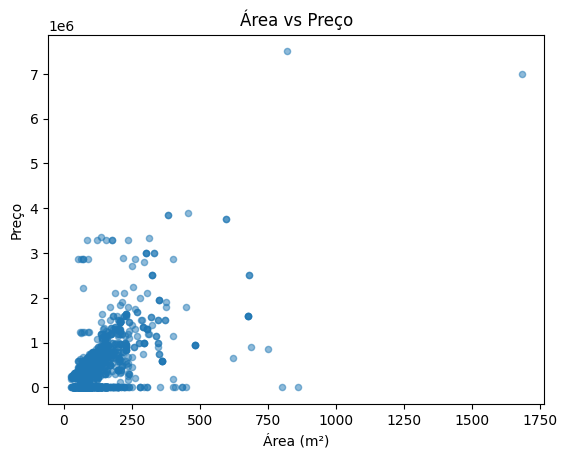

In [20]:
houses.plot.scatter(x='area', y='price', alpha=0.5)
plt.title('Área vs Preço')
plt.xlabel('Área (m²)')
plt.ylabel('Preço')
plt.show()

In [21]:
!pip install folium


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import folium

# Centro aproximado de Recife
mapa = folium.Map(location=[-8.05, -34.9], zoom_start=12)

for _, row in houses.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue' if row['operation'] == 'sell' else 'green',
        fill=True,
        fill_opacity=0.6,
        popup=f"Preço: R${row['price']}\nTipo: {row['type']}"
    ).add_to(mapa)

mapa

In [23]:
from folium.plugins import HeatMap

# Filtra imóveis para aluguel com latitude, longitude e preço válidos
rent_houses = houses[(houses['operation'] == 'sell') &
                     houses['latitude'].notnull() &
                     houses['longitude'].notnull() &
                     houses['price'].notnull()]

# Cria o mapa centralizado em Recife
heatmap_map = folium.Map(location=[-8.05, -34.9], zoom_start=12)

# Adiciona o HeatMap
HeatMap(
    data=rent_houses[['latitude', 'longitude', 'price']].values,
    radius=10,
    max_zoom=13
).add_to(heatmap_map)

heatmap_map

Exercícios
1. Calcule o preço médio do metro quadrado de venda e aluguel para Recife.
2. Plote um histograma da coluna area.
3. Plote um boxplot do preço para apartamentos e casas separadamente.
4. Plote um gráfico de dispersão entre bedrooms e area.
5. Encontre os bairros com maior e menor valor de venda e aluguel do metro quadrado.
6. Encontre a variável que tem maior correlação de spearman com o preço de imóveis à venda

In [70]:
# 1. Calcule o preço médio do metro quadrado de venda e aluguel para Recife.
avg_sell = house_sells[['price']].mean()
avg_rental = house_rentals[['price']].mean()

print(f"Avg Sell: {avg_sell}, Avg Rent: {avg_rental}")


Avg Sell: price    652942.432716
dtype: float64, Avg Rent: price    1553.045833
dtype: float64


In [ ]:
# 2. Plote um histograma da coluna area.

In [59]:
house_rentals[['price']].mean()


price    1553.045833
dtype: float64

In [27]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 13.9 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [32]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

def analyze_price_suburb_correlation(df, price_col='price', suburb_col='suburb'):
    """
    Analyze the correlation between price and suburb using multiple approaches.
    
    Parameters:
    df (DataFrame): The dataset containing price and suburb columns
    price_col (str): Name of the price column (default: 'price')
    suburb_col (str): Name of the suburb column (default: 'suburb')
    
    Returns:
    dict: Dictionary containing correlation results and statistics
    """
    
    # Ensure we have the required columns
    if price_col not in df.columns or suburb_col not in df.columns:
        raise ValueError(f"Columns '{price_col}' or '{suburb_col}' not found in dataframe")
    
    # Remove rows with missing values
    clean_df = df[[price_col, suburb_col]].dropna()
    
    print(f"Dataset info:")
    print(f"- Total records: {len(clean_df)}")
    print(f"- Unique suburbs: {clean_df[suburb_col].nunique()}")
    print(f"- Price range: ${clean_df[price_col].min():,.0f} - ${clean_df[price_col].max():,.0f}")
    print("-" * 50)
    
    results = {}
    
    # 1. ANOVA F-test (tests if suburb affects price significantly)
    print("1. ANOVA F-test:")
    suburb_groups = [group[price_col].values for name, group in clean_df.groupby(suburb_col)]
    f_stat, p_value = stats.f_oneway(*suburb_groups)
    
    results['anova'] = {
        'f_statistic': f_stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    }
    
    print(f"   F-statistic: {f_stat:.4f}")
    print(f"   P-value: {p_value:.4e}")
    print(f"   Significant: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")
    print()
    
    # 2. Eta-squared (effect size - how much of price variation is explained by suburb)
    ss_between = sum([len(group) * (group[price_col].mean() - clean_df[price_col].mean())**2 
                     for name, group in clean_df.groupby(suburb_col)])
    ss_total = sum((clean_df[price_col] - clean_df[price_col].mean())**2)
    eta_squared = ss_between / ss_total
    
    results['eta_squared'] = eta_squared
    
    print("2. Eta-squared (Effect Size):")
    print(f"   η² = {eta_squared:.4f}")
    print(f"   Interpretation: {get_effect_size_interpretation(eta_squared)}")
    print(f"   Suburb explains {eta_squared*100:.2f}% of price variation")
    print()
    
    # 3. Correlation ratio (alternative measure)
    correlation_ratio = np.sqrt(eta_squared)
    results['correlation_ratio'] = correlation_ratio
    
    print("3. Correlation Ratio:")
    print(f"   η = {correlation_ratio:.4f}")
    print()
    
    # 4. Point-biserial correlation (for encoded suburbs)
    le = LabelEncoder()
    suburb_encoded = le.fit_transform(clean_df[suburb_col])
    point_biserial_corr, pb_p_value = stats.pearsonr(clean_df[price_col], suburb_encoded)
    
    results['point_biserial'] = {
        'correlation': point_biserial_corr,
        'p_value': pb_p_value
    }
    
    print("4. Point-biserial correlation (with encoded suburbs):")
    print(f"   Correlation: {point_biserial_corr:.4f}")
    print(f"   P-value: {pb_p_value:.4e}")
    print("   Note: This treats suburbs as ordinal, which may not be appropriate")
    print()
    
    # 5. Descriptive statistics by suburb
    suburb_stats = clean_df.groupby(suburb_col)[price_col].agg([
        'count', 'mean', 'median', 'std'
    ]).round(2)
    suburb_stats.columns = ['Count', 'Mean_Price', 'Median_Price', 'Std_Price']
    suburb_stats = suburb_stats.sort_values('Mean_Price', ascending=False)
    
    results['suburb_statistics'] = suburb_stats
    
    print("5. Price statistics by suburb (top 10 by average price):")
    print(suburb_stats.head(10))
    print()
    
    # 6. Create visualizations
    create_price_suburb_visualizations(clean_df, price_col, suburb_col, suburb_stats)
    
    return results

In [35]:
def get_effect_size_interpretation(eta_squared):
    """Interpret eta-squared effect size"""
    if eta_squared < 0.01:
        return "Very small effect"
    elif eta_squared < 0.06:
        return "Small effect"
    elif eta_squared < 0.14:
        return "Medium effect"
    else:
        return "Large effect"

def create_price_suburb_visualizations(df, price_col, suburb_col, suburb_stats):
    """Create visualizations for price-suburb relationship"""
    
    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Price vs Suburb Analysis', fontsize=16, fontweight='bold')
    
    # 1. Box plot of top 15 suburbs by count
    top_suburbs = df[suburb_col].value_counts().head(15).index
    df_top = df[df[suburb_col].isin(top_suburbs)]
    
    ax1 = axes[0, 0]
    sns.boxplot(data=df_top, x=suburb_col, y=price_col, ax=ax1)
    ax1.set_title('Price Distribution by Suburb (Top 15 by Count)')
    ax1.set_xlabel('Suburb')
    ax1.set_ylabel('Price')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Mean price by suburb (top 15)
    top_price_suburbs = suburb_stats.head(15)
    ax2 = axes[0, 1]
    bars = ax2.bar(range(len(top_price_suburbs)), top_price_suburbs['Mean_Price'])
    ax2.set_title('Average Price by Suburb (Top 15)')
    ax2.set_xlabel('Suburb')
    ax2.set_ylabel('Average Price')
    ax2.set_xticks(range(len(top_price_suburbs)))
    ax2.set_xticklabels(top_price_suburbs.index, rotation=45, ha='right')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom', fontsize=8)
    
    # 3. Scatter plot: Count vs Average Price
    ax3 = axes[1, 0]
    scatter = ax3.scatter(suburb_stats['Count'], suburb_stats['Mean_Price'], 
                         alpha=0.6, s=50)
    ax3.set_xlabel('Number of Properties')
    ax3.set_ylabel('Average Price')
    ax3.set_title('Average Price vs Number of Properties by Suburb')
    
    # Add correlation coefficient
    corr_coef = np.corrcoef(suburb_stats['Count'], suburb_stats['Mean_Price'])[0, 1]
    ax3.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', 
             transform=ax3.transAxes, fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 4. Price distribution histogram with suburb overlay
    ax4 = axes[1, 1]
    ax4.hist(df[price_col], bins=50, alpha=0.7, edgecolor='black')
    ax4.set_xlabel('Price')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Overall Price Distribution')
    
    # Add summary statistics
    mean_price = df[price_col].mean()
    median_price = df[price_col].median()
    ax4.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:,.0f}')
    ax4.axvline(median_price, color='green', linestyle='--', label=f'Median: ${median_price:,.0f}')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Additional visualization: Heatmap of price ranges by district if available
    if 'district' in df.columns:
        create_district_suburb_heatmap(df, price_col)

def create_district_suburb_heatmap(df, price_col):
    """Create a heatmap showing price patterns by district and suburb"""
    # Create price ranges
    df_copy = df.copy()
    df_copy['price_range'] = pd.cut(df_copy[price_col], 
                                   bins=5, 
                                   labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Create crosstab
    crosstab = pd.crosstab(df_copy['district'], df_copy['price_range'], normalize='index') * 100
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='YlOrRd', 
                cbar_kws={'label': 'Percentage'})
    plt.title('Price Range Distribution by District (%)')
    plt.xlabel('Price Range')
    plt.ylabel('District')
    plt.tight_layout()
    plt.show()

In [53]:
from scipy import stats
# Example usage:
# Assuming your dataframe is called 'df'
# results = analyze_price_suburb_correlation(houses)

# To access specific results:
# print(f"Eta-squared: {results['eta_squared']:.4f}")
# print(f"ANOVA p-value: {results['anova']['p_value']:.4e}")



Dataset info:
- Total records: 1241
- Unique suburbs: 51
- Price range: $1 - $7,500,000
--------------------------------------------------
1. ANOVA F-test:
   F-statistic: 3.6158
   P-value: 3.0236e-15
   Significant: Yes (α = 0.05)

2. Eta-squared (Effect Size):
   η² = 0.1319
   Interpretation: Medium effect
   Suburb explains 13.19% of price variation

3. Correlation Ratio:
   η = 0.3632

4. Point-biserial correlation (with encoded suburbs):
   Correlation: -0.0649
   P-value: 2.2297e-02
   Note: This treats suburbs as ordinal, which may not be appropriate

5. Price statistics by suburb (top 10 by average price):
                Count  Mean_Price  Median_Price   Std_Price
suburb                                                     
Santo AntÌ«nio      1  1800000.00     1800000.0         NaN
Derby               4  1276909.75      636069.5  1389177.91
Santana             5  1206000.00     1200000.0   998839.33
Soledade           13  1193943.38      620000.0  1868665.26
Jaqueira        

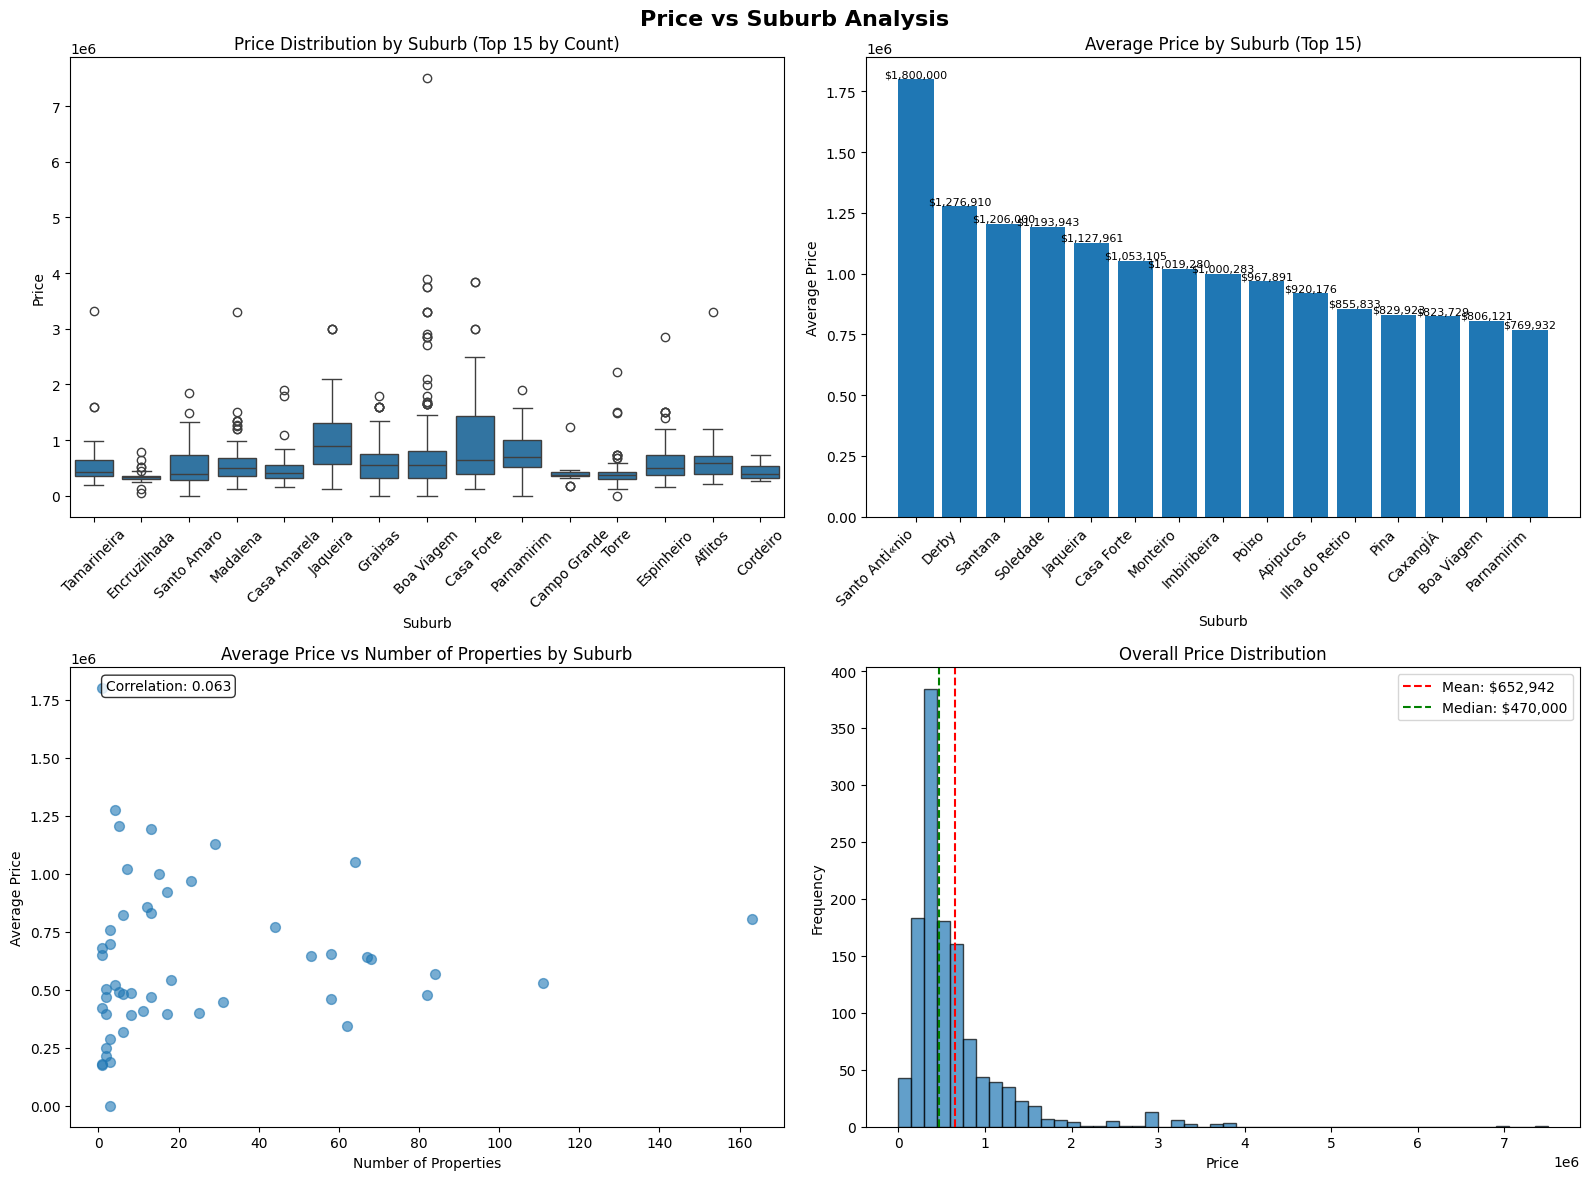

In [54]:
hs_results = analyze_price_suburb_correlation(house_sells)

Dataset info:
- Total records: 480
- Unique suburbs: 44
- Price range: $150 - $12,000
--------------------------------------------------
1. ANOVA F-test:
   F-statistic: 1.5374
   P-value: 1.8939e-02
   Significant: Yes (α = 0.05)

2. Eta-squared (Effect Size):
   η² = 0.1317
   Interpretation: Medium effect
   Suburb explains 13.17% of price variation

3. Correlation Ratio:
   η = 0.3628

4. Point-biserial correlation (with encoded suburbs):
   Correlation: -0.1168
   P-value: 1.0414e-02
   Note: This treats suburbs as ordinal, which may not be appropriate

5. Price statistics by suburb (top 10 by average price):
                       Count  Mean_Price  Median_Price  Std_Price
suburb                                                           
Cidade UniversitÌÁria      3     4081.67        2100.0    4235.74
Derby                      3     3226.67         880.0    4134.02
Casa Forte                 7     2882.86        2600.0    2356.24
Jaqueira                   6     2541.67        

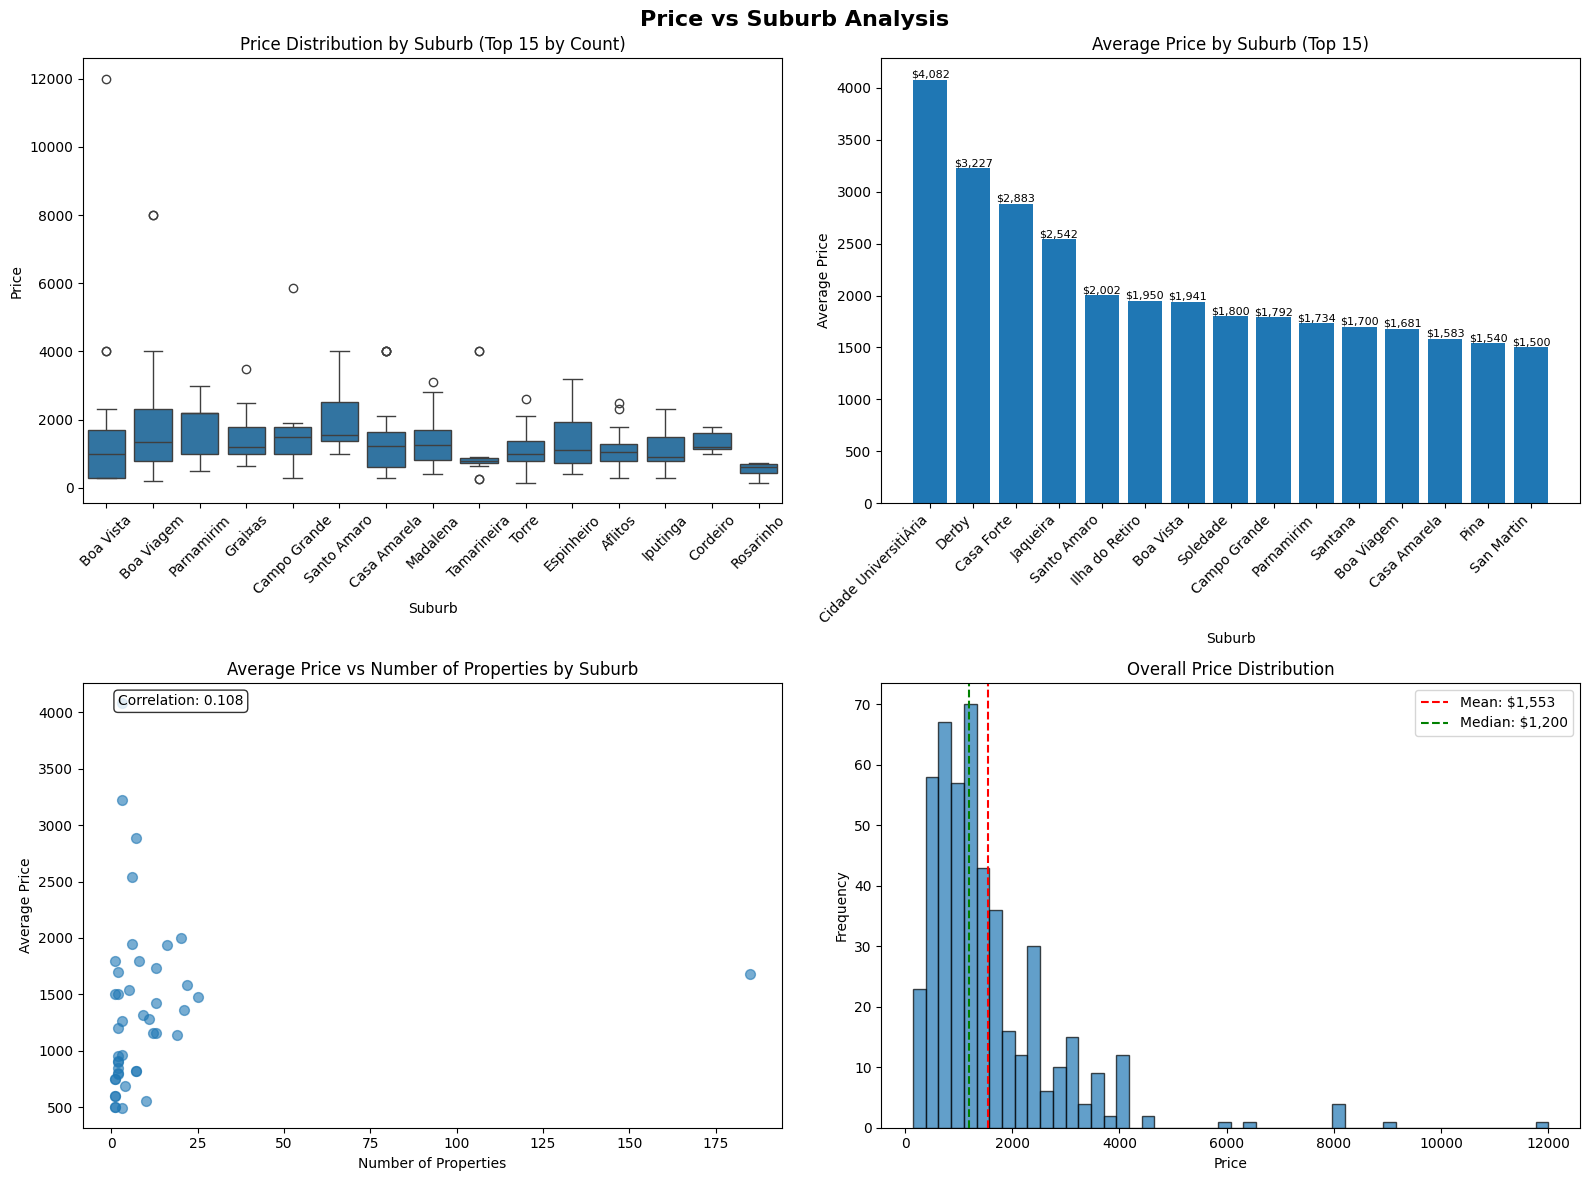

In [55]:
hr_results = analyze_price_suburb_correlation(house_rentals)

In [39]:
# Teste de Mann-Whitney U
print("Teste de Mann-Whitney U entre os preços dos tipos de imóveis:")
print(f'pvalue: {stats.mannwhitneyu(houses[houses['type'] == 'apart']['price'], 
                                    houses[houses['type'] == 'house']['price'])[1]}')

# conclusão
if stats.mannwhitneyu(houses[houses['type'] == 'apart']['price'], 
                             houses[houses['type'] == 'house']['price'])[1] < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa entre os preços dos tipos de imóveis.")
else:   
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre os preços dos tipos de imóveis.")

Teste de Mann-Whitney U entre os preços dos tipos de imóveis:
pvalue: 0.0023778043202494848
Rejeitamos a hipótese nula: há diferença significativa entre os preços dos tipos de imóveis.


In [45]:
# mesmo teste para o preço por m2
print("Teste de Mann-Whitney U entre os preços por m2 dos tipos de imóveis:")
print(f'pvalue: {stats.mannwhitneyu(houses[houses['type'] == 'apart']['price_m2'],
                                    houses[houses['type'] == 'house']['price_m2'])[1]}') 

# conclusão
if stats.mannwhitneyu(houses[houses['type'] == 'apart']['price_m2'], houses[houses['type'] == 'house']['price_m2'])[1] < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa entre os preços por m2 dos tipos de imóveis.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre os preços por m2 dos tipos de imóveis.")

Teste de Mann-Whitney U entre os preços por m2 dos tipos de imóveis:
pvalue: nan
Não rejeitamos a hipótese nula: não há diferença significativa entre os preços por m2 dos tipos de imóveis.


In [46]:
# First, create the price_m2 column
# Make sure to handle cases where area might be 0 or NaN

houses['price_m2'] = houses['price'] / houses['area']

# Remove rows where area is 0 or NaN (which would create infinite or NaN price_m2)
houses = houses.dropna(subset=['price_m2'])
houses = houses[houses['price_m2'] != np.inf]

# Check if the column was created successfully
print("Price per m² column created successfully!")
print(f"Dataset shape: {houses.shape}")
print(f"Price per m² range: ${houses['price_m2'].min():.2f} - ${houses['price_m2'].max():.2f}")
print()

# Check the available property types in your dataset
print("Available property types:")
print(houses['type'].value_counts())
print()

# Now perform the Mann-Whitney U test
print("Teste de Mann-Whitney U entre os preços por m² dos tipos de imóveis:")

# Make sure both property types exist in your data
if 'apart' in houses['type'].values and 'house' in houses['type'].values:
    # Get the data for each type
    apart_price_m2 = houses[houses['type'] == 'apart']['price_m2']
    house_price_m2 = houses[houses['type'] == 'house']['price_m2']
    
    print(f"Apartments: {len(apart_price_m2)} samples")
    print(f"Houses: {len(house_price_m2)} samples")
    
    # Perform the test
    statistic, p_value = stats.mannwhitneyu(apart_price_m2, house_price_m2)
    
    print(f'Mann-Whitney U statistic: {statistic}')
    print(f'P-value: {p_value:.6f}')
    
    # Conclusion
    alpha = 0.05
    if p_value < alpha:
        print(f"Conclusão: Há diferença significativa entre os preços por m² (p < {alpha})")
        
        # Show descriptive statistics
        print(f"\nEstatísticas descritivas:")
        print(f"Apartamentos - Preço/m² médio: ${apart_price_m2.mean():.2f}")
        print(f"Apartamentos - Preço/m² mediano: ${apart_price_m2.median():.2f}")
        print(f"Casas - Preço/m² médio: ${house_price_m2.mean():.2f}")
        print(f"Casas - Preço/m² mediano: ${house_price_m2.median():.2f}")
        
        if apart_price_m2.median() > house_price_m2.median():
            print("Apartamentos têm preço por m² significativamente maior que casas")
        else:
            print("Casas têm preço por m² significativamente maior que apartamentos")
    else:
        print(f"Conclusão: Não há diferença significativa entre os preços por m² (p >= {alpha})")

else:
    print("Warning: Property types 'apart' and/or 'house' not found in the data.")
    print("Available types:", houses['type'].unique())
    
    # If you have different type names, adjust accordingly
    # For example, if your types are 'apartment' and 'house':
    # apart_price_m2 = houses[houses['type'] == 'apartment']['price_m2']
    # house_price_m2 = houses[houses['type'] == 'house']['price_m2']

Price per m² column created successfully!
Dataset shape: (1721, 15)
Price per m² range: $0.00 - $56039.22

Available property types:
type
apart    1609
house     112
Name: count, dtype: int64

Teste de Mann-Whitney U entre os preços por m² dos tipos de imóveis:
Apartments: 1609 samples
Houses: 112 samples
Mann-Whitney U statistic: 120449.5
P-value: 0.000000
Conclusão: Há diferença significativa entre os preços por m² (p < 0.05)

Estatísticas descritivas:
Apartamentos - Preço/m² médio: $4019.49
Apartamentos - Preço/m² mediano: $4324.32
Casas - Preço/m² médio: $2241.40
Casas - Preço/m² mediano: $1919.05
Apartamentos têm preço por m² significativamente maior que casas
